In [4]:
import cv2 as cv #pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt

cv.putText() function is used to draw text on an image

text="ABCDE" specifies the text you want to draw.

org=(50, 300) defines the starting point (X, Y) where the text will be placed.

fontFace=cv.FONT_HERSHEY_SIMPLEX specifies the font style.

fontScale=5 adjusts the size of the text.

color=(255, 255, 255) is the color (in RGB, white in this case).

thickness=25 controls the thickness of the text's strokes.

lineType=cv.LINE_AA uses anti-aliased lines, which smooth out the text edges

In [ ]:
def loadimage():
    blank=np.zeros((600,600))#create empty black page , Output will be float64 by default in ones and zeros
    cv.putText(blank,text="ABCDE",org=(50,300),fontFace=cv.FONT_HERSHEY_SIMPLEX,fontScale=5,color=(255,255,255),thickness=25,lineType=cv.LINE_AA)
    return blank


In [20]:
def displayimage(img):
    fig=plt.figure(figsize=(12,10))
    plt.imshow(img,cmap='gray')
#gray:black and white since matplot will display RGB and cv BGR

dtype('float64')

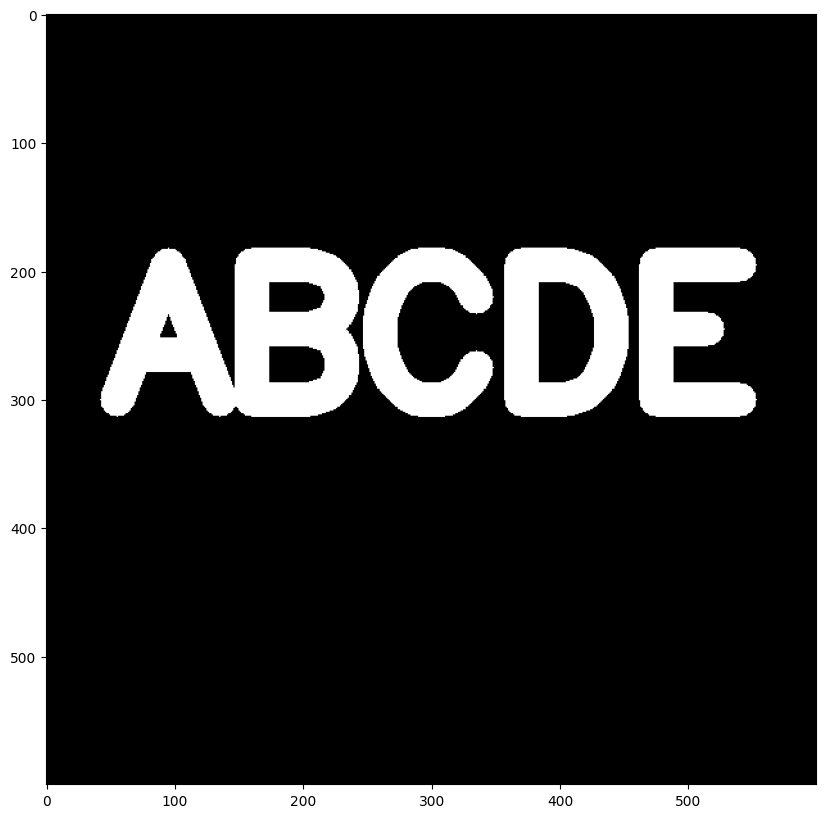

In [ ]:
image=loadimage()
displayimage(image)
image.dtype
#because plt.imgshow keep dtype as it is where as cv.imgshow convert int (normalizing value btw 0 and 255)

Erison: white image becomes wighter and black becomes blacker

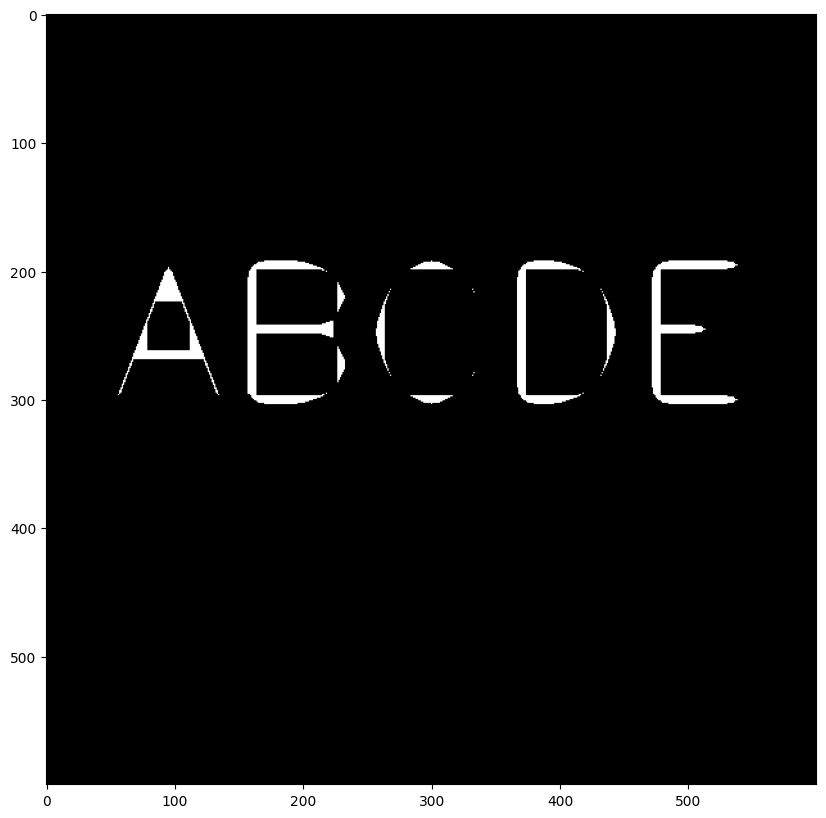

In [ ]:
kernel=np.ones((5,5),dtype="uint8")
erison1=cv.erode(image,kernel,iterations=5)
displayimage(erison1)
#kernel is like a brush size for eroding we use small size of kernel like (3,3) while for dilation (expanding use (5,5)))

Erosion and dilation are applied to white pixels (255) because in binary images, white is typically the foreground (the objects you care about), and black (0) is the background.

Erosion shrinks the white regions, and dilation expands them.

Opening is performed by first applying erosion followed by dilation using the same structuring element. This helps remove small foreground objects

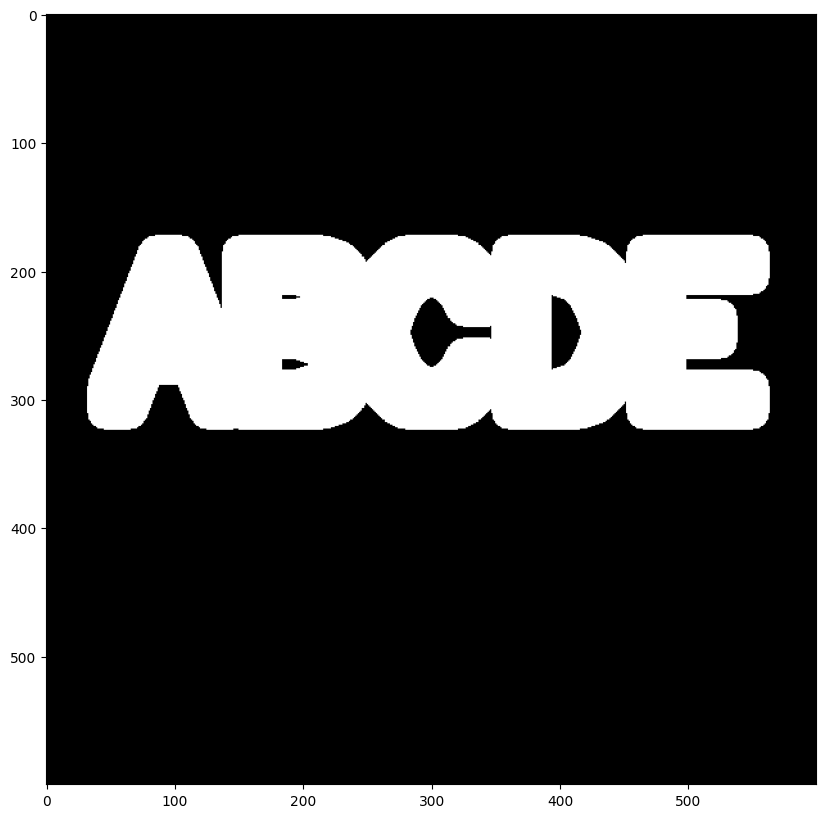

In [ ]:
#Dilation # erison
kernel=np.ones((5,5),dtype="uint8")
dilation=cv.dilate(image,kernel,iterations=5)
displayimage(dilation)



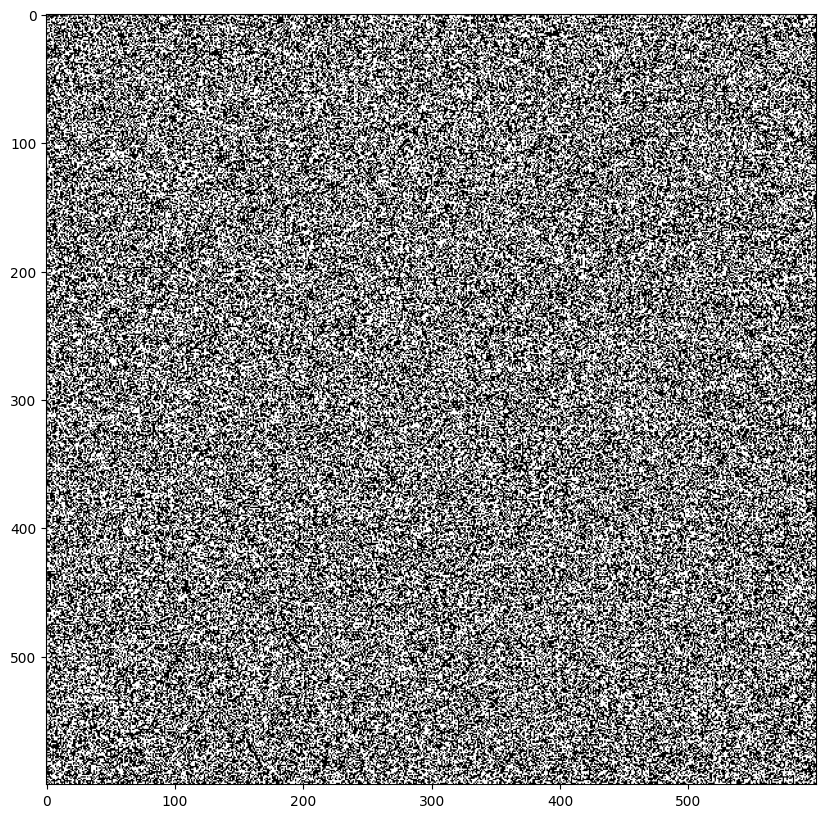

In [ ]:
#opening erosion followed by dialation, erosion+dilation
img=loadimage()
noise=np.random.randint(low=0,high=2,size=(600,600)) #create noise array randomly integers btw 0 and 1 and same size as original since i want to add noise
whitenoise=noise*255#convert to white, multiply noise by 255 so its color will become btw white and black
displayimage(whitenoise)

In [17]:
whitenoise.shape
whitenoise.dtype

dtype('int32')

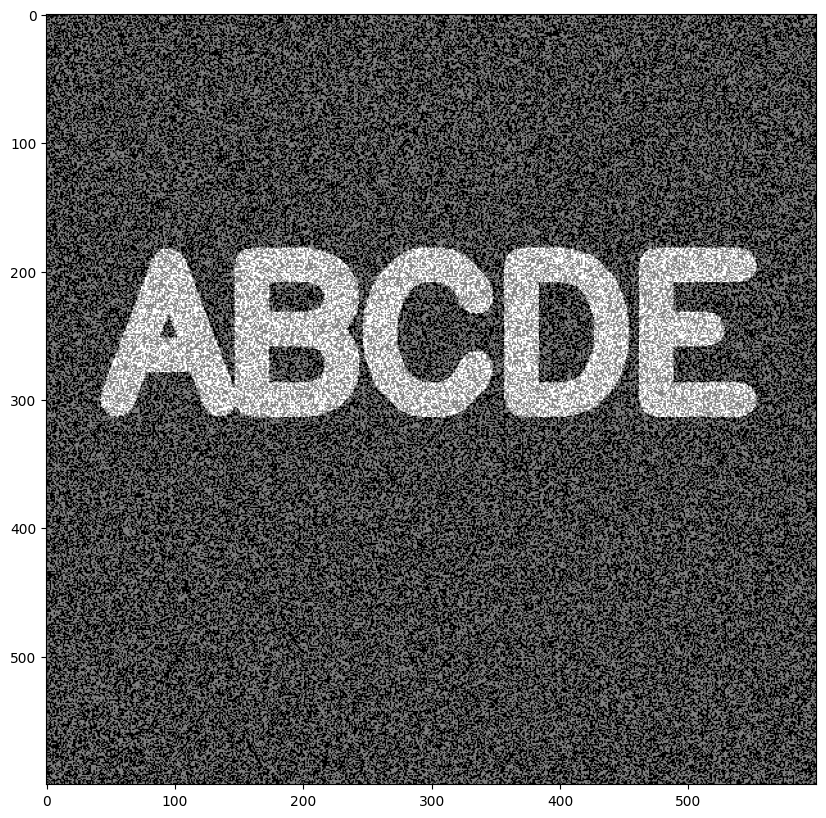

In [22]:
noiseimage= whitenoise+image
displayimage(noiseimage)
#summation of arrays of two images regardless there type bbut should be same shape
#bitwise they sould be same type and size

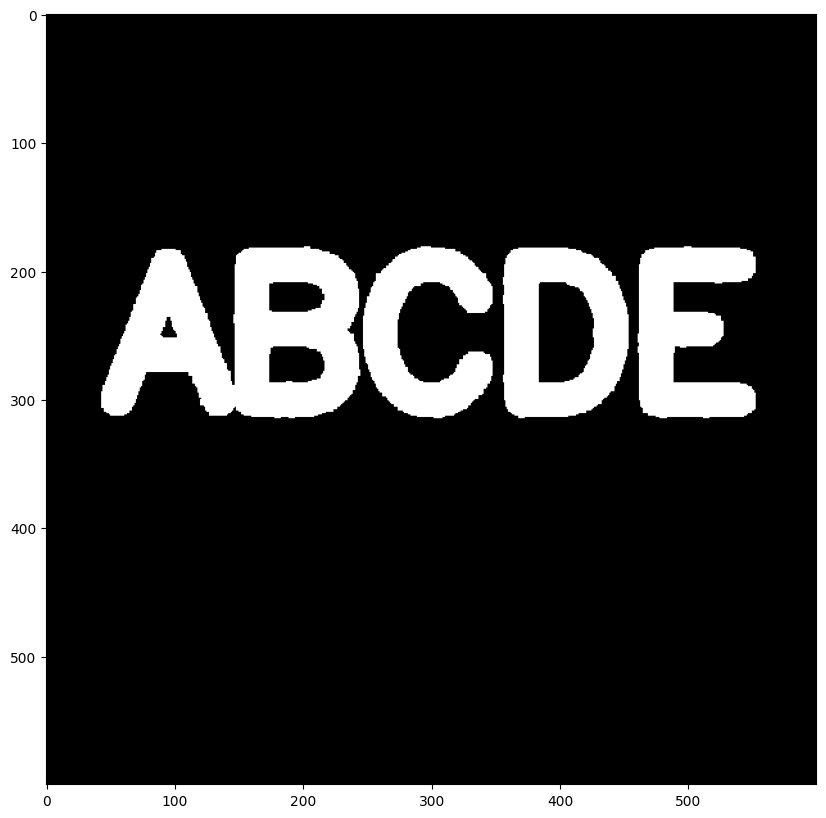

In [ ]:
#now after we add noise to my picture we can remove it using open
clean=cv.morphologyEx(noiseimage,cv.MORPH_OPEN,kernel)
displayimage(clean)


Conclusion if we want to clean background of image use opening
where forground like letters use closing 